<div dir="rtl">

**سؤال ۱۱:**  
سیستم LTI با پاسخ ضربه زیر داده شده است:

$$ h(t) = e^{-2t} u(t) $$

سیگنال ورودی

$$ x(t) = u(t) - u(t-1) $$

را با استفاده از انتگرال کانولوشن محاسبه کنید و پاسخ سیستم $y(t)$ را رسم نمایید.

</div>


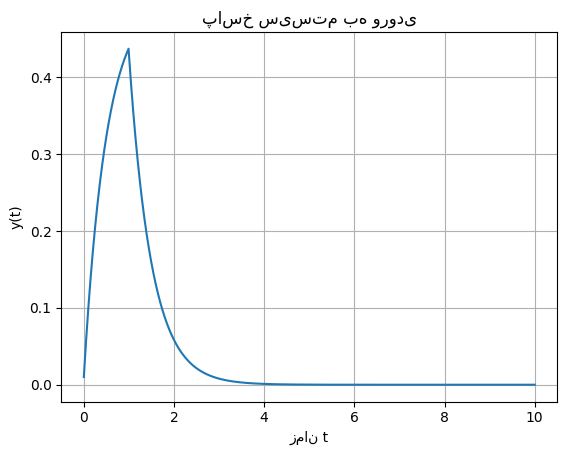

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

t = np.linspace(0, 5, 500)
dt = t[1] - t[0]
h = np.exp(-2 * t) * (t >= 0)
x = (t >= 0).astype(float) - (t >= 1).astype(float)

y = convolve(x, h)*dt
t_conv = np.linspace(0, 2*5, 2*500 - 1)

plt.plot(t_conv, y)
plt.title("پاسخ سیستم به ورودی")
plt.xlabel("زمان t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۱۲:**  
سیگنال $x(t) = \sin(2\pi 3 t)$ را در بازه‌ی $[0,1]$ رسم کنید. سپس سیگنال با تاخیر $0.1$ ثانیه یعنی $x(t-0.1)$ را نیز رسم کنید و تفاوت فاز آن‌ها را به صورت عددی بررسی کنید.

</div>


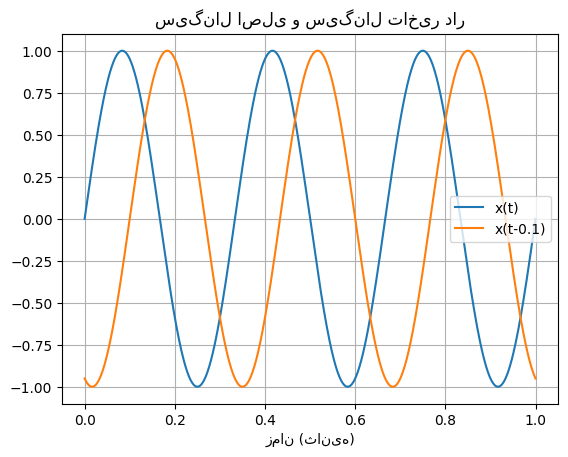

تفاوت فاز به رادیان: 1.88


In [2]:
t = np.linspace(0, 1, 1000)
x = np.sin(2*np.pi*3*t)
x_delay = np.sin(2*np.pi*3*(t-0.1))

import matplotlib.pyplot as plt
plt.plot(t, x, label="x(t)")
plt.plot(t, x_delay, label="x(t-0.1)")
plt.title("سیگنال اصلی و سیگنال تاخیر دار")
plt.xlabel("زمان (ثانیه)")
plt.legend()
plt.grid(True)
plt.show()

phase_diff = 2*np.pi*3*0.1
print(f"تفاوت فاز به رادیان: {phase_diff:.2f}")


<div dir="rtl">

**سؤال ۱۳:**  
فیلتر FIR با ضرایب زیر را تعریف کنید:

$$ h[n] = \frac{1}{3} \delta[n] + \frac{1}{3} \delta[n-1] + \frac{1}{3} \delta[n-2] $$

تابع انتقال $H(e^{j\omega})$ را محاسبه کرده و نمودار قدر مطلق آن را رسم نمایید.

</div>


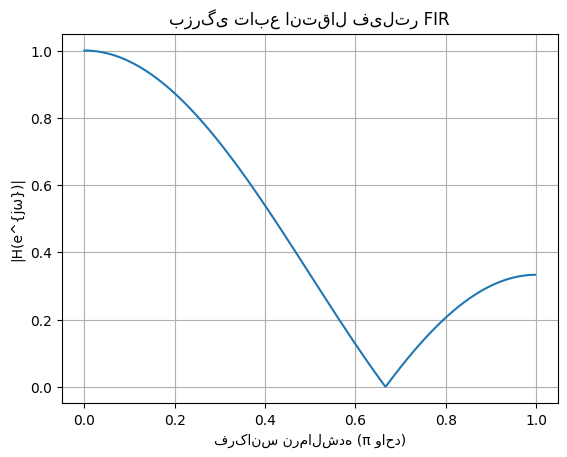

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

h = np.ones(3) / 3
w, H = freqz(h)

plt.plot(w/np.pi, np.abs(H))
plt.title("بزرگی تابع انتقال فیلتر FIR")
plt.xlabel("فرکانس نرمال‌شده (π واحد)")
plt.ylabel("|H(e^{jω})|")
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۱۴:**  
سیگنال ورودی $x(t) = \cos(2\pi \cdot 50 t)$ را در نرخ نمونه‌برداری $f_s = 80$ هرتز نمونه‌برداری کنید و سیگنال نمونه‌برداری شده را رسم نمایید. اثر آلیاسینگ را توضیح دهید.

</div>


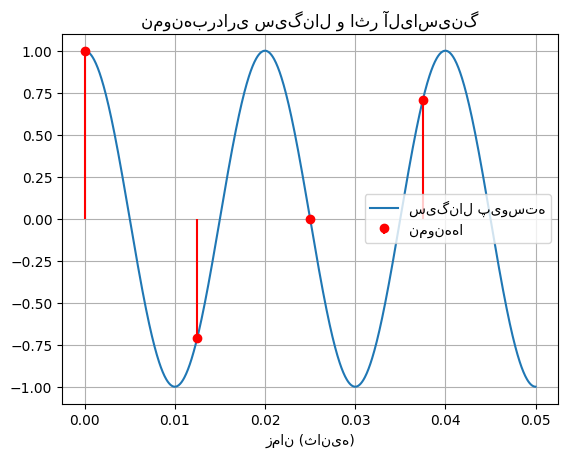

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = 50
fs = 80
t = np.linspace(0, 0.05, 1000)
x = np.cos(2*np.pi*f*t)

n = np.arange(0, 0.05, 1/fs)
x_sampled = np.cos(2*np.pi*f*n)

plt.plot(t, x, label="سیگنال پیوسته")
plt.stem(n, x_sampled, 'r', label="نمونه‌ها", basefmt=" ")
plt.title("نمونه‌برداری سیگنال و اثر آلیاسینگ")
plt.xlabel("زمان (ثانیه)")
plt.legend()
plt.grid(True)
plt.show()


<div dir="rtl">

**سؤال ۱۵:**  
یک سیگنال نویزی

$$ x[n] = \sin\left(\frac{2\pi n}{10}\right) + 0.5 \cdot \text{noise} $$

را تولید کنید. سپس یک فیلتر میانگین‌گیر با طول ۵ و یک فیلتر FIR ساده همانند فیلتر میانگین‌گیر را روی سیگنال اعمال کنید و نتایج را مقایسه نمایید.

</div>


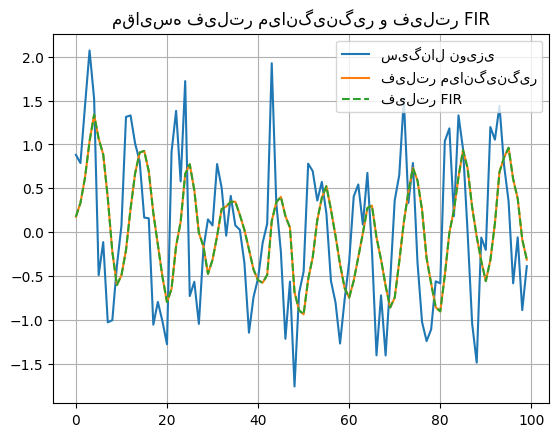

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

np.random.seed(0)
n = np.arange(100)
x = np.sin(2*np.pi*n/10) + 0.5*np.random.randn(100)

# فیلتر میانگین‌گیر با طول 5
h_avg = np.ones(5)/5

y_avg = lfilter(h_avg, 1, x)
y_fir = lfilter(h_avg, 1, x)  # چون فیلتر میانگین‌گیر خودش یک فیلتر FIR است

plt.plot(n, x, label="سیگنال نویزی")
plt.plot(n, y_avg, label="فیلتر میانگین‌گیر")
plt.plot(n, y_fir, linestyle='--', label="فیلتر FIR")
plt.legend()
plt.title("مقایسه فیلتر میانگین‌گیر و فیلتر FIR")
plt.grid(True)
plt.show()
